# **Setup**

## Import notebooks

In [1]:
%%capture
# Note the python import here
import reuse, sys

# This is the Ipython hook
sys.meta_path.append(reuse.NotebookFinder())
from feature_selection import X_train, y_train, X_test, y_test

## Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [3]:
plt.style.use('dark_background')

plt.rcParams.update({
    "savefig.transparent": True
})

# **Improve model**

## Find the optimal number of neighbors

The optimal number of neighbors is 2 and the accuracy score is 0.8288180610889774


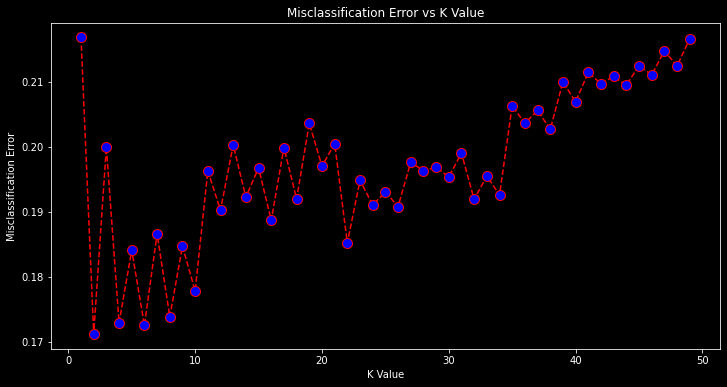

In [4]:
neighbors = list(range(1, 50))

accuracy_scores = []

for k in neighbors:
    np.random.seed(0)
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
    scores = accuracy_score(y_test, knn.predict(X_test))
    accuracy_scores.append(scores)

# changing to misclassification error
mse = [1 - x for x in accuracy_scores]

# determining best k
optimal_k = neighbors[mse.index(min(mse))]
print(f"The optimal number of neighbors is {optimal_k} and the accuracy score is {max(accuracy_scores)}")

# plot misclassification error vs k
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), mse, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Misclassification Error vs K Value')
plt.xlabel('K Value')
plt.ylabel('Misclassification Error')
plt.savefig('images/other/knn.png', dpi=200)